# Nombre: Augusto Meza Peña
## Tarea 1
## Ley de Zipf y stemming

### Checklist
1. Quitar los signos de puntuación del corpus.
2. Obtener el stem de cada token en el corpus.
3. Obtener el número de tokens y tipos del corpus
4. Obtener la gráfica de la distribución de las palabras (curva de Zipf) ordenadas de mayor a menor por sus rangos estadísticos.
5. Obtener la gráfica normal y con escala logaritmica

**Nota: En el directorio donde este el notebook debe estar la carpeta con el corpus**

In [1]:
from nltk import word_tokenize
from nltk.stem import SnowballStemmer
from unicodedata import category
from sys import maxunicode
from os import walk
from nltk.probability import FreqDist
import matplotlib.pyplot as plt
from pprint import pprint


# Save all Unicode characters for punctuation in a list
punctuation = [char for char in range(maxunicode) if category(chr(char)).startswith('P')]

class Corpus():
    def __init__(self,directory_path,encoding):
        """
        Class that process a Corpus and obtains usefull information
        :param directory_path: Relative path to the FOLDER with the txt files
        :param encoding: Encoding of these texts
        """
        self.directory_path = directory_path
        self.encoding = encoding
        self.text = '' #files are small so we can save them in a String
        self.tokens = None
        self.types = None
        self.stems = dict()
        self.freq = None
        self._processFile()
    def _processFile(self):
        """Retrieves the text from all the files, strips punctuation and sets lowercase,
           then tokenizes the String and obtains the types
           after that ir obtains the stem of all the types"""
        self._retrieve_text()
        no_punctuation = self.text.translate(dict.fromkeys(punctuation))
        self.tokens = word_tokenize(no_punctuation.lower())
        stemmer = SnowballStemmer("spanish")
        self.types = set(self.tokens)
        for token in self.types:
            self.stems.update({token:stemmer.stem(token)})
        self._obtain_graphs()
        print("File correctly processed")

    def _retrieve_text(self):
        """ Obtaings all the files in the given directory and attempts to join them to the corpus"""
        filenames = self._files_from_directory()
        for filename in filenames:
            with open(self.directory_path+'/'+filename, encoding=self.encoding) as currentfile:
                for line in currentfile:
                    self.text+=line

    def _files_from_directory(self):
        """Crawls only the root folder looking for any files"""
        f = []
        for (dirpath, dirnames, filenames) in walk(self.directory_path):
            f.extend(filenames)
            break
        return f

    def _obtain_graphs(self):
        """ Obtains via FreqDist the frequency and then sorts it from the most to the less frequent"""
        dist = FreqDist(word for word in self.tokens)
        words_tuple = dist.most_common()
        self.types = [word[0] for word in words_tuple]
        self.freq = [word[1] for word in words_tuple]
        plt.title('Zipf Distribution')
        plt.ylabel('Frequency')
        plt.xlabel('Words')

    def numTokens(self):
        return 'The corpus has '+str(len(self.tokens))+' tokens'

    def numTypes(self):
        return 'The corpus has '+str(len(self.types))+' types'

    def plotGraph(self):
        plt.plot(self.freq)
        plt.xscale('linear')
        plt.yscale('linear')
        plt.show()

    def plotLogGraph(self):
        plt.plot(self.freq)
        plt.xscale('log')
        plt.yscale('log')
        plt.show()

corpus = Corpus("corpus1",'utf-8')

File correctly processed


## Numero de Tokens y Tipos

In [2]:
print(corpus.numTokens())
print(corpus.numTypes())

The corpus has 1350 tokens
The corpus has 553 types


## Grafica

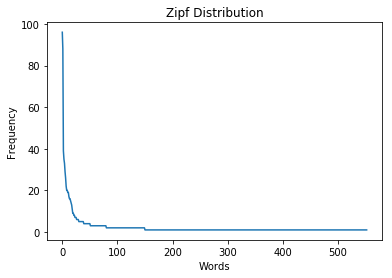

In [3]:
corpus.plotGraph()

## Grafica con escala Logaritmica

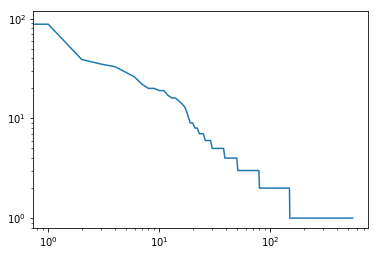

In [4]:
corpus.plotLogGraph()

## Raices de las palabras

In [5]:
pprint(corpus.stems)

{'10': '10',
 '106': '106',
 '13': '13',
 '14': '14',
 '150': '150',
 '200': '200',
 '3': '3',
 '40': '40',
 '42000': '42000',
 '5': '5',
 '56': '56',
 '600000': '600000',
 '72': '72',
 '8': '8',
 'a': 'a',
 'abarcar': 'abarc',
 'abdominal': 'abdominal',
 'abdominales': 'abdominal',
 'absorción': 'absorcion',
 'acidez': 'acidez',
 'además': 'ademas',
 'adulta': 'adult',
 'afecta': 'afect',
 'afectada': 'afect',
 'afectado': 'afect',
 'afectados': 'afect',
 'agente': 'agent',
 'agrega': 'agreg',
 'agresiva': 'agres',
 'agua': 'agu',
 'al': 'al',
 'albergue': 'alberg',
 'algunas': 'algun',
 'alguno': 'algun',
 'aliento': 'alient',
 'alimentos': 'aliment',
 'aliviar': 'alivi',
 'alta': 'alta',
 'aminoazúcares': 'aminoazucar',
 'aminoácidos': 'aminoac',
 'amonio': 'amoni',
 'anaeróbica': 'anaerob',
 'animales': 'animal',
 'antes': 'antes',
 'aparición': 'aparicion',
 'apenas': 'apen',
 'aphidicola': 'aphidicol',
 'apunta': 'apunt',
 'aquellas': 'aquell',
 'aquí': 'aqu',
 'aseguran': 'asegu

 'sangre': 'sangr',
 'sanguínea': 'sanguine',
 'sanitarios': 'sanitari',
 'se': 'se',
 'secreción': 'secrecion',
 'según': 'segun',
 'semicocidos': 'semicoc',
 'sensación': 'sensacion',
 'sentir': 'sent',
 'ser': 'ser',
 'seres': 'ser',
 'serie': 'seri',
 'serpientes': 'serpient',
 'servicios': 'servici',
 'setenta': 'setent',
 'señala': 'señal',
 'shock': 'shock',
 'si': 'si',
 'sido': 'sid',
 'siete': 'siet',
 'simbiosomas': 'simbiosom',
 'simbiótica': 'simbiot',
 'similar': 'simil',
 'sin': 'sin',
 'sino': 'sin',
 'sistemas': 'sistem',
 'sobrerproducción': 'sobrerproduccion',
 'son': 'son',
 'sopla': 'sopl',
 'su': 'su',
 'sucios': 'suci',
 'suficiente': 'suficient',
 'sus': 'sus',
 'sustancia': 'sustanci',
 'sustancias': 'sustanci',
 'séptico': 'septic',
 'síntesis': 'sintesis',
 'síntomas': 'sintom',
 'sólo': 'sol',
 'tales': 'tal',
 'también': 'tambien',
 'tan': 'tan',
 'tanto': 'tant',
 'tarda': 'tard',
 'tercera': 'tercer',
 'test': 'test',
 'tiende': 'tiend',
 'tiene': 'tien',